In [46]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
import seaborn as sns

In [47]:
sprocket = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')
df1 = pd.read_excel (sprocket, 'Transactions')
df2 = pd.read_excel (sprocket, 'NewCustomerList')
df3 = pd.read_excel (sprocket, 'CustomerDemographic')
df4 = pd.read_excel (sprocket, 'CustomerAddress')


# TRANSACTIONS SHEET

In [48]:
df1

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [50]:
df1.columns

Index(['Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [51]:
df1.columns = df1.iloc[0]

In [52]:
df1.drop([0], axis = 0, inplace = True)

In [53]:
df1.reset_index(drop= True, inplace =True)

In [54]:
df1

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19996,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19997,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19998,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [55]:
df1.shape

(20000, 13)

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


<AxesSubplot:>

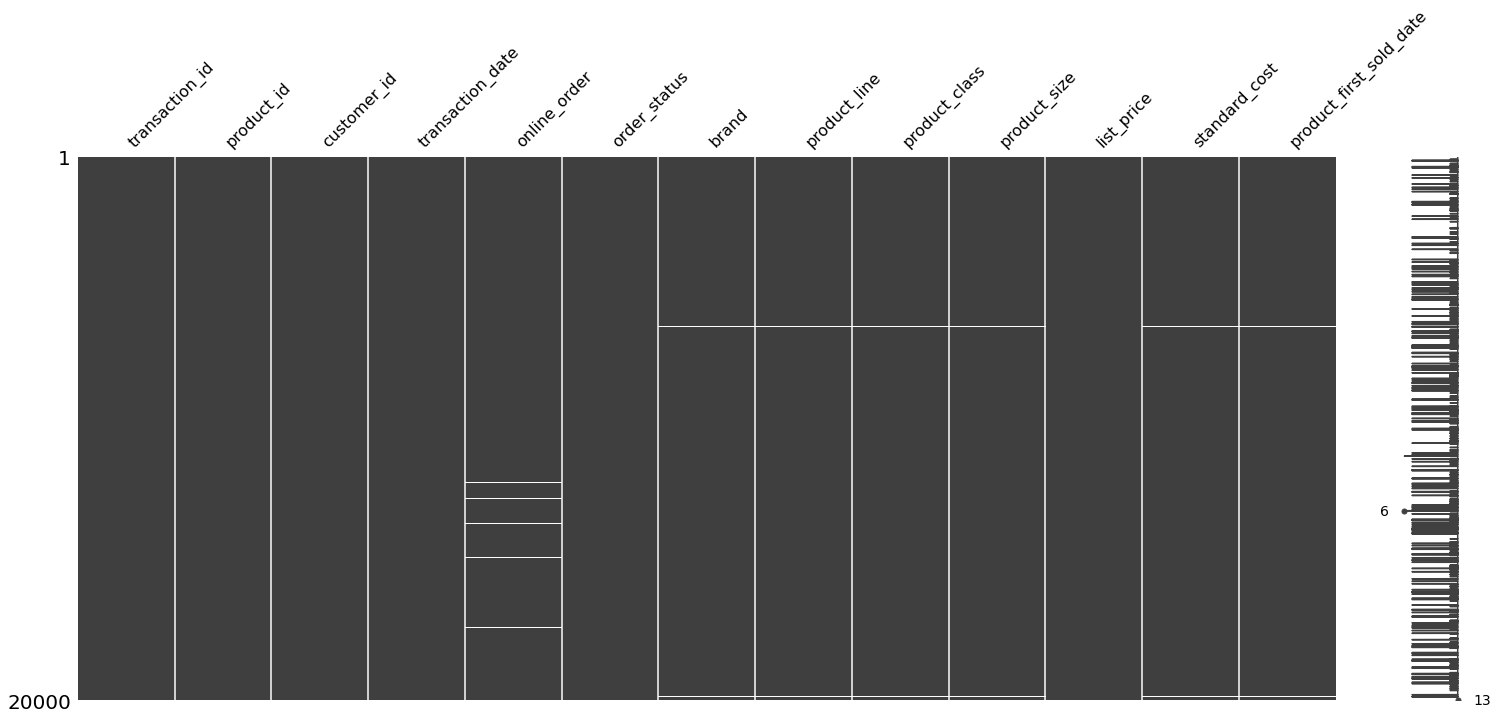

In [57]:
msno.matrix(df1)

In [58]:
df1.isna().sum()

0
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [59]:
df1.dtypes

0
transaction_id             object
product_id                 object
customer_id                object
transaction_date           object
online_order               object
order_status               object
brand                      object
product_line               object
product_class              object
product_size               object
list_price                 object
standard_cost              object
product_first_sold_date    object
dtype: object

In [77]:
# Convert it using to_datetime() function
df1["transaction_date"] = pd.to_datetime(df1["transaction_date"])

df1['transaction_id'] = pd.to_numeric(df1['transaction_id'])
df1['product_id'] = pd.to_numeric(df1['product_id'])
df1['customer_id'] = pd.to_numeric(df1['customer_id'])
df1['list_price'] = pd.to_numeric(df1['list_price'])
df1['standard_cost'] = pd.to_numeric(df1['standard_cost'])
df1['product_first_sold_date'] = pd.to_numeric(df1['product_first_sold_date'])


# Let's see it
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [78]:
df1.nunique()

0
transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

# NEW CUSTOMER LIST

In [90]:
df2

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.875000,0.743750,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.112500,0.945625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.010000,1.010000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.087500,1.087500,4.0,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.79,0.7900,0.790000,0.790000,996.0,996,0.374
997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.76,0.7600,0.950000,0.807500,997.0,997,0.357
998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.85,1.0625,1.062500,1.062500,997.0,997,0.357
999,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,1.09,1.3625,1.362500,1.158125,997.0,997,0.357


In [202]:
df2['deceased_indicator'].head(50)

0     N
1     N
2     N
3     N
4     N
5     N
6     N
7     N
8     N
9     N
10    N
11    N
12    N
13    N
14    N
15    N
16    N
17    N
18    N
19    N
20    N
21    N
22    N
23    N
24    N
25    N
26    N
27    N
28    N
29    N
30    N
31    N
32    N
33    N
34    N
35    N
36    N
37    N
38    N
39    N
40    N
41    N
42    N
43    N
44    N
45    N
46    N
47    N
48    N
49    N
Name: deceased_indicator, dtype: object

In [91]:
df2.columns = df2.iloc[0]
df2.drop([0], axis = 0, inplace = True)
df2.reset_index(drop= True, inplace =True)
df2

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.875000,0.743750,1.0,1,1.71875
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.112500,0.945625,1.0,1,1.71875
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.010000,1.010000,1.0,1,1.71875
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.087500,1.087500,4.0,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.650000,0.650000,4.0,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.79,0.7900,0.790000,0.790000,996.0,996,0.374
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.76,0.7600,0.950000,0.807500,997.0,997,0.357
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.85,1.0625,1.062500,1.062500,997.0,997,0.357
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,1.09,1.3625,1.362500,1.158125,997.0,997,0.357


In [92]:
df2.isna().sum()

0
first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
NaN                                      0
NaN                                      0
NaN                                      0
NaN                                      0
NaN                                      0
Rank                                     0
Value                                    0
dtype: in

In [94]:
df2.dtypes

0
first_name                              object
last_name                               object
gender                                  object
past_3_years_bike_related_purchases     object
DOB                                     object
job_title                               object
job_industry_category                   object
wealth_segment                          object
deceased_indicator                      object
owns_car                                object
tenure                                  object
address                                 object
postcode                                object
state                                   object
country                                 object
property_valuation                      object
NaN                                    float64
NaN                                    float64
NaN                                    float64
NaN                                    float64
NaN                                    float64
Rank       

In [95]:
df2


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.875000,0.743750,1.0,1,1.71875
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.112500,0.945625,1.0,1,1.71875
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.010000,1.010000,1.0,1,1.71875
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.087500,1.087500,4.0,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.650000,0.650000,4.0,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.79,0.7900,0.790000,0.790000,996.0,996,0.374
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.76,0.7600,0.950000,0.807500,997.0,997,0.357
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.85,1.0625,1.062500,1.062500,997.0,997,0.357
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,1.09,1.3625,1.362500,1.158125,997.0,997,0.357


In [96]:
df2.columns

Index([                         'first_name',
                                 'last_name',
                                    'gender',
       'past_3_years_bike_related_purchases',
                                       'DOB',
                                 'job_title',
                     'job_industry_category',
                            'wealth_segment',
                        'deceased_indicator',
                                  'owns_car',
                                    'tenure',
                                   'address',
                                  'postcode',
                                     'state',
                                   'country',
                        'property_valuation',
                                         nan,
                                         nan,
                                         nan,
                                         nan,
                                         nan,
                                  

In [ ]:
df2['past_3_years_bike_related_purchases'] = pd.to_numeric(df2['past_3_years_bike_related_purchases'])
df2['property_valuation'] = pd.to_numeric(df2['property_valuation'])
df2['Rank'] = pd.to_numeric(df2['Rank'])  
df2['Value'] = pd.to_numeric(df2['Value'])  

df2["DOB"] = pd.to_datetime(df2["DOB"])


df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [138]:
df2.iloc[867,6]

nan

In [139]:
df2.iloc[[867,6]]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
867,Mycah,Beaston,Male,11,1961-07-31,Environmental Specialist,NaN,High Net Worth,N,Yes,...,NSW,Australia,11,1.09,1.3625,1.703125,1.703125,865.0,865,0.550000
6,Rutledge,Hallt,Male,23,1976-10-06,Compensation Analyst,Financial Services,Mass Customer,N,No,...,NSW,Australia,7,0.40,0.4000,0.400000,0.340000,6.0,6,1.671875


In [165]:
df2.sort_values(by = 'DOB',ascending =True).head(50)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
797,Anthony,Morison,Male,7,1938-06-08,General Manager,Health,Mass Customer,N,No,...,NSW,Australia,9,1.03,1.0300,1.287500,1.094375,797.0,797,0.600000
885,Zachariah,Meininking,Male,40,1938-06-09,Cost Accountant,Financial Services,Affluent Customer,N,Yes,...,NSW,Australia,7,0.56,0.7000,0.700000,0.700000,883.0,883,0.531250
769,Andrea,Pendle,Female,86,1938-08-05,NaN,NaN,High Net Worth,N,Yes,...,QLD,Australia,6,0.58,0.7250,0.906250,0.906250,760.0,760,0.637500
585,Letizia,Poore,Female,27,1938-08-30,Web Developer II,Manufacturing,Affluent Customer,N,No,...,VIC,Australia,3,0.81,0.8100,0.810000,0.810000,583.0,583,0.787500
265,Alleen,Eaken,Female,56,1938-08-31,NaN,NaN,Mass Customer,N,No,...,NSW,Australia,12,0.64,0.6400,0.800000,0.680000,259.0,259,1.062500
689,Willard,Booton,Male,69,1938-09-02,NaN,Health,High Net Worth,N,Yes,...,NSW,Australia,9,0.74,0.9250,1.156250,1.156250,688.0,688,0.697000
414,Wyn,Meach,Male,37,1938-09-10,NaN,Manufacturing,Mass Customer,N,No,...,NSW,Australia,9,0.83,0.8300,1.037500,0.881875,415.0,415,0.921875
191,Franklin,Wohler,Male,55,1938-10-16,Clinical Specialist,Health,Mass Customer,N,Yes,...,NSW,Australia,8,0.91,1.1375,1.137500,0.966875,191.0,191,1.150000
18,Odilia,Quick,Female,65,1938-11-09,General Manager,Manufacturing,Affluent Customer,N,Yes,...,NSW,Australia,11,0.53,0.6625,0.828125,0.828125,19.0,19,1.531250
406,Kippar,Brimilcome,Male,21,1938-11-29,Graphic Designer,Health,Mass Customer,N,No,...,NSW,Australia,11,0.79,0.7900,0.987500,0.839375,405.0,405,0.930000


In [166]:
df2.sort_values(by = 'DOB',ascending =True).tail(50)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
518,Maddalena,Angood,Female,79,1999-07-28,NaN,Manufacturing,Affluent Customer,N,No,...,NSW,Australia,4,0.86,0.8600,0.860000,0.860000,515.0,515,0.839375
11,Wheeler,Winward,Male,48,1999-08-30,Environmental Specialist,Manufacturing,Mass Customer,N,No,...,VIC,Australia,8,0.55,0.5500,0.550000,0.467500,12.0,12,1.625000
72,Kevina,Ferandez,Female,73,1999-09-21,Assistant Professor,Financial Services,High Net Worth,N,No,...,QLD,Australia,9,0.97,0.9700,1.212500,1.212500,72.0,72,1.350000
95,Jehu,Prestedge,Male,91,1999-10-20,NaN,Manufacturing,High Net Worth,N,Yes,...,NSW,Australia,12,0.53,0.6625,0.828125,0.828125,96.0,96,1.300000
336,Ebony,Conrad,Female,8,1999-10-24,Environmental Tech,Financial Services,Mass Customer,N,Yes,...,VIC,Australia,7,0.42,0.5250,0.525000,0.446250,334.0,334,0.998750
364,Clotilda,Southers,Female,62,1999-11-08,Computer Systems Analyst II,Financial Services,Mass Customer,N,Yes,...,NSW,Australia,4,0.98,1.2250,1.225000,1.041250,361.0,361,0.977500
708,Alta,Pithcock,Female,64,1999-11-18,GIS Technical Architect,Financial Services,Mass Customer,N,No,...,NSW,Australia,7,0.61,0.6100,0.610000,0.518500,708.0,708,0.680000
64,Cristen,Maroney,Female,22,1999-11-21,Accountant IV,IT,High Net Worth,N,Yes,...,QLD,Australia,7,0.58,0.7250,0.725000,0.725000,65.0,65,1.362500
472,Sigismund,Sedger,Male,9,1999-11-29,Accountant II,Manufacturing,Affluent Customer,N,No,...,NSW,Australia,10,0.71,0.7100,0.887500,0.887500,473.0,473,0.884000
718,Nalani,Hallad,Female,15,1999-11-30,Environmental Specialist,Health,Affluent Customer,N,Yes,...,VIC,Australia,9,0.62,0.7750,0.968750,0.968750,719.0,719,0.675000


In [193]:
duplicate = df2[df2.duplicated()]
duplicate

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value


# Customer Demographics

In [128]:
df3

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,3996,Rosalia,Halgarth,Female,8,1975-08-09 00:00:00,VP Product Management,Health,Mass Customer,N,-100,No,19
3997,3997,Blanch,Nisuis,Female,87,2001-07-13 00:00:00,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1
3998,3998,Sarene,Woolley,U,60,NaN,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3999,3999,Patrizius,NaN,Male,11,1973-10-24 00:00:00,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10


In [129]:
df3.columns = df3.iloc[0]
df3.drop([0], axis = 0, inplace = True)
df3.reset_index(drop= True, inplace =True)
df3

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09 00:00:00,VP Product Management,Health,Mass Customer,N,-100,No,19
3996,3997,Blanch,Nisuis,Female,87,2001-07-13 00:00:00,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1
3997,3998,Sarene,Woolley,U,60,NaN,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24 00:00:00,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10


In [170]:
df3.shape


(4000, 13)

In [141]:
df3.isnull().sum()

0
customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [143]:
df3.dtypes

0
customer_id                            object
first_name                             object
last_name                              object
gender                                 object
past_3_years_bike_related_purchases    object
DOB                                    object
job_title                              object
job_industry_category                  object
wealth_segment                         object
deceased_indicator                     object
default                                object
owns_car                               object
tenure                                 object
dtype: object

In [147]:
df3['customer_id'] = pd.to_numeric(df3['customer_id'])
df3['past_3_years_bike_related_purchases'] = pd.to_numeric(df3['past_3_years_bike_related_purchases'])  
df3['tenure'] = pd.to_numeric(df3['tenure'])

df3["DOB"] = pd.to_datetime(df3["DOB"])

In [148]:
df3.dtypes

0
customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
dtype: object

In [171]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [154]:
df3.sort_values(by = 'DOB',ascending =True).head(50)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0
719,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0
1091,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0
3409,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16.0
2412,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0
657,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,Yes,8.0
1242,1243,Robbert,Blakey,Male,73,1953-08-09,Research Assistant II,Retail,Mass Customer,N,"""'",No,8.0
1564,1565,Jay,Janiszewski,Male,71,1953-08-17,Sales Representative,Retail,High Net Worth,N,NaN,Yes,11.0
1176,1177,Bobbette,Pozzi,Female,47,1953-08-31,Food Chemist,Health,Affluent Customer,N,100,Yes,6.0
3470,3471,Brita,Afonso,Female,95,1953-09-05,Quality Engineer,IT,High Net Worth,N,ÅâÂ´â°ËÃÂ¨ËÃâââ,Yes,8.0


In [164]:
df3[df3['DOB'] < ('1950-01-01')] [['customer_id', 'DOB']]

,customer_id,DOB
33,34,1843-12-21
657,658,1944-01-24
719,720,1931-10-23
1091,1092,1935-08-22
2412,2413,1943-08-11
3409,3410,1940-09-22


In [167]:
df2.sort_values(by = 'DOB',ascending =True).tail(50)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
518,Maddalena,Angood,Female,79,1999-07-28,NaN,Manufacturing,Affluent Customer,N,No,...,NSW,Australia,4,0.86,0.8600,0.860000,0.860000,515.0,515,0.839375
11,Wheeler,Winward,Male,48,1999-08-30,Environmental Specialist,Manufacturing,Mass Customer,N,No,...,VIC,Australia,8,0.55,0.5500,0.550000,0.467500,12.0,12,1.625000
72,Kevina,Ferandez,Female,73,1999-09-21,Assistant Professor,Financial Services,High Net Worth,N,No,...,QLD,Australia,9,0.97,0.9700,1.212500,1.212500,72.0,72,1.350000
95,Jehu,Prestedge,Male,91,1999-10-20,NaN,Manufacturing,High Net Worth,N,Yes,...,NSW,Australia,12,0.53,0.6625,0.828125,0.828125,96.0,96,1.300000
336,Ebony,Conrad,Female,8,1999-10-24,Environmental Tech,Financial Services,Mass Customer,N,Yes,...,VIC,Australia,7,0.42,0.5250,0.525000,0.446250,334.0,334,0.998750
364,Clotilda,Southers,Female,62,1999-11-08,Computer Systems Analyst II,Financial Services,Mass Customer,N,Yes,...,NSW,Australia,4,0.98,1.2250,1.225000,1.041250,361.0,361,0.977500
708,Alta,Pithcock,Female,64,1999-11-18,GIS Technical Architect,Financial Services,Mass Customer,N,No,...,NSW,Australia,7,0.61,0.6100,0.610000,0.518500,708.0,708,0.680000
64,Cristen,Maroney,Female,22,1999-11-21,Accountant IV,IT,High Net Worth,N,Yes,...,QLD,Australia,7,0.58,0.7250,0.725000,0.725000,65.0,65,1.362500
472,Sigismund,Sedger,Male,9,1999-11-29,Accountant II,Manufacturing,Affluent Customer,N,No,...,NSW,Australia,10,0.71,0.7100,0.887500,0.887500,473.0,473,0.884000
718,Nalani,Hallad,Female,15,1999-11-30,Environmental Specialist,Health,Affluent Customer,N,Yes,...,VIC,Australia,9,0.62,0.7750,0.968750,0.968750,719.0,719,0.675000


# Customer Address

In [173]:
df4

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
...,...,...,...,...,...,...
3995,3999,1482 Hauk Trail,3064,VIC,Australia,3
3996,4000,57042 Village Green Point,4511,QLD,Australia,6
3997,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3998,4002,8194 Lien Street,4032,QLD,Australia,7


In [174]:
df4.columns = df4.iloc[0]
df4.drop([0], axis = 0, inplace = True)
df4.reset_index(drop= True, inplace =True)
df4

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [208]:
df4.shape

(3999, 6)

In [212]:
df4['state'].head(50)

0     New South Wales
1     New South Wales
2                 QLD
3     New South Wales
4                 VIC
5     New South Wales
6     New South Wales
7     New South Wales
8                 VIC
9                 QLD
10                VIC
11    New South Wales
12    New South Wales
13                VIC
14                VIC
15    New South Wales
16    New South Wales
17    New South Wales
18    New South Wales
19    New South Wales
20                QLD
21                QLD
22                VIC
23                QLD
24                QLD
25    New South Wales
26    New South Wales
27    New South Wales
28    New South Wales
29                QLD
30                QLD
31    New South Wales
32                QLD
33                QLD
34    New South Wales
35    New South Wales
36                VIC
37                VIC
38                QLD
39                QLD
40    New South Wales
41                VIC
42    New South Wales
43                VIC
44    New South Wales
45    New 

In [176]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


In [180]:
df4.isnull().sum()

0
customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [178]:
df4['customer_id'] = pd.to_numeric(df4['customer_id'])
df4['property_valuation'] = pd.to_numeric(df4['property_valuation'])
df4['postcode'] = pd.to_numeric(df4['postcode'])  



df4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [182]:
df4.head(50)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
5,7,4 Delaware Trail,2210,New South Wales,Australia,9
6,8,49 Londonderry Lane,2650,New South Wales,Australia,4
7,9,97736 7th Trail,2023,New South Wales,Australia,12
8,11,93405 Ludington Park,3044,VIC,Australia,8
9,12,44339 Golden Leaf Alley,4557,QLD,Australia,4
